In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-applications/googleplaystore.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("../input/google-play-store-applications/googleplaystore.csv")

In [5]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [6]:
df.head(5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


how many rows and colums are there

In [7]:
df.shape

(10841, 14)

5 point summary of data, statistical info about numerical column

In [8]:
df.describe()

,Unnamed: 0,Rating
count,10841.000000,9367.000000
mean,5420.000000,4.193338
std,3129.671468,0.537431
min,0.000000,1.000000
25%,2710.000000,4.000000
50%,5420.000000,4.300000
75%,8130.000000,4.500000
max,10840.000000,19.000000


In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True) #dropping index column 


In [10]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [11]:
df.duplicated().sum() #searching and returning number of duplicate values

483

In [12]:
df = df.drop_duplicates() #dropperd duplicates

In [13]:
df.shape #size of df is reduced

(10358, 13)

In [14]:
df.dtypes #accessing data types of columns

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**above we can see reviews data is of 'object' type even after having numeric values - why??**

In [15]:
df['Reviews'].dtype

dtype('O')

In [16]:
df.Reviews.str.isnumeric() #.str = string object .isnumeric = if something is string or not

0        True
1        True
2        True
3        True
4        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: Reviews, Length: 10358, dtype: bool

**if above result is true, then why is it still of object type?**

In [17]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [18]:
dfcopy = df.copy() #deep copying

In [19]:
dfcopy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


**above data was reduced(removed duplicates) but indexing isnot**

In [20]:
dfcopy.reset_index(drop = True, inplace = True)

In [21]:
dfcopy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [22]:
dfcopy[~dfcopy.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [23]:
dfcopy = dfcopy.drop(dfcopy.index[9990])

In [24]:
dfcopy[~dfcopy.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [25]:
dfcopy['Reviews'] = dfcopy['Reviews'].astype('int')
dfcopy.Reviews.dtype

dtype('int64')

In [26]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [27]:
#for size
dfcopy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [28]:
def size_process(item):
    if str(item)[-1] == 'M':
        res = float(str(item).replace('M',''))
        res = res*1024
        return res
    elif str(item)[-1] == 'k':
        res = float(str(item).replace('k',''))
        return res
    else:
        return str(np.NaN)

In [29]:
dfcopy["Size"] = dfcopy["Size"].apply(size_process)

In [30]:
df.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [31]:
dfcopy.Size.dtype


dtype('O')

In [32]:
dfcopy.Size = dfcopy.Size.astype('float')

In [33]:
dfcopy.Size.dtype

dtype('float64')

In [34]:
dfcopy['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10353         5,000+
10354           100+
10355         1,000+
10356         1,000+
10357    10,000,000+
Name: Installs, Length: 10357, dtype: object

**here '+' and ',' are making this column object**

In [35]:
dfcopy['Installs'] = dfcopy['Installs'].str.replace("+","").str.replace(",","")

In [36]:
dfcopy['Installs'].astype(int)

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10353        5000
10354         100
10355        1000
10356        1000
10357    10000000
Name: Installs, Length: 10357, dtype: int64

In [37]:
dfcopy.Price.unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [38]:
char_to_remove = ["+", ",", "$"]
cols_to_remove = ["Installs", "Price"]

for char in char_to_remove:
    for col in cols_to_remove:
        dfcopy[col] = dfcopy[col].str.replace(char,"")

In [39]:
dfcopy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [40]:
# dfcopy['Price'] = dfcopy['Price'].astype(int)
dfcopy['Installs'] = dfcopy['Installs'].astype(int)

In [41]:
dfcopy['Price'] = dfcopy['Price'].astype(float)

In [42]:
dfcopy['Last Updated']

0         7-Jan-18
1        15-Jan-18
2         1-Aug-18
3         8-Jun-18
4        20-Jun-18
           ...    
10353    25-Jul-17
10354     6-Jul-18
10355    20-Jan-17
10356    19-Jan-15
10357    25-Jul-18
Name: Last Updated, Length: 10357, dtype: object

In [43]:
dfcopy['Last Updated'] = pd.to_datetime(dfcopy['Last Updated'])

In [44]:
dfcopy['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10353   2017-07-25
10354   2018-07-06
10355   2017-01-20
10356   2015-01-19
10357   2018-07-25
Name: Last Updated, Length: 10357, dtype: datetime64[ns]

In [45]:
dfcopy['month'] = dfcopy['Last Updated'].dt.month
dfcopy['day'] = dfcopy['Last Updated'].dt.day
dfcopy['year'] = dfcopy['Last Updated'].dt.year

In [46]:
dfcopy.drop('Last Updated', axis = 1, inplace = True)

In [47]:
dfcopy['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [48]:
dfcopy['Android Ver'] = dfcopy['Android Ver'].str.replace("and up", "").str.replace("Varies with device","")

In [49]:
 dfcopy[dfcopy.duplicated("App")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,month,day,year
260,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,NaN,5000000,Free,0.0,Everyone,Business,Varies with device,4.0.3,2,26,2018
261,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35840.0,100000000,Free,0.0,Everyone,Business,9.7.14188,4.1,8,2,2018
262,Slack,BUSINESS,4.4,51510,NaN,5000000,Free,0.0,Everyone,Business,Varies with device,,8,2,2018
348,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,1000000000,Free,0.0,Everyone,Communication,Varies with device,,8,1,2018
349,imo free video calls and chat,COMMUNICATION,4.3,4785988,11264.0,500000000,Free,0.0,Everyone,Communication,9.8.000000010501,4.0,6,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10165,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,NaN,100000000,Free,0.0,Everyone,Video Players & Editors,Varies with device,,5,2,2018
10233,FarmersOnly Dating,DATING,3.0,1145,1433.6,100000,Free,0.0,Mature 17+,Dating,2.2,4.0,2,25,2016
10238,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4096.0,1000000,Free,0.0,Everyone,Communication,5.2,5.0,7,6,2018
10248,FP Notebook,MEDICAL,4.5,410,61440.0,50000,Free,0.0,Everyone,Medical,2.1.0.372,4.4,3,24,2018


In [50]:
dfcopy = dfcopy.drop_duplicates(subset = ["App"], keep = 'first')

In [51]:
 dfcopy[dfcopy.duplicated("App")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,month,day,year


In [52]:
dfcopy.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Current Ver        object
Android Ver        object
month               int32
day                 int32
year                int32
dtype: object

In [53]:
categorical_features = {i for i in dfcopy.columns if dfcopy[i].dtype == 'O'}

In [54]:
numerical_features = {i for i in dfcopy.columns if dfcopy[i].dtype != 'O'}

In [55]:
 dfcopy["Type"].value_counts()

Type
Free    8902
Paid     756
Name: count, dtype: int64

In [56]:
 dfcopy["Type"].value_counts(normalize = True)*100

Type
Free    92.172292
Paid     7.827708
Name: proportion, dtype: float64

In [57]:
for col in categorical_features:
    print(f"{col}: {dfcopy[col].value_counts(normalize = True)*100}")

App: App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
Android Ver: Android Ver
4.1              22.802112
4.0.3            14.445480
4.0              13.306410
                 10.251631
4.4               8.470540
2.3               6.378793
5.0               5.301854
4.2               3.852128
2.3.3             2.826965
2.2               2.474889


In [58]:
 dfcopy["Type"].value_counts(normalize = True)*100

Type
Free    92.172292
Paid     7.827708
Name: proportion, dtype: float64

<Axes: xlabel='Type', ylabel='count'>

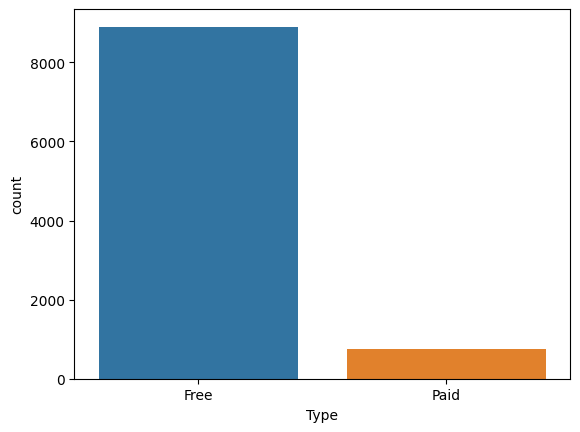

In [59]:
sns.countplot(x=dfcopy.Type)

In [60]:
dfcopy["Content Rating"].value_counts(normalize=True)*100

Content Rating
Everyone           81.820064
Teen               10.725748
Mature 17+          4.068744
Everyone 10+        3.333678
Adults only 18+     0.031059
Unrated             0.020706
Name: proportion, dtype: float64

<Axes: xlabel='Content Rating', ylabel='count'>

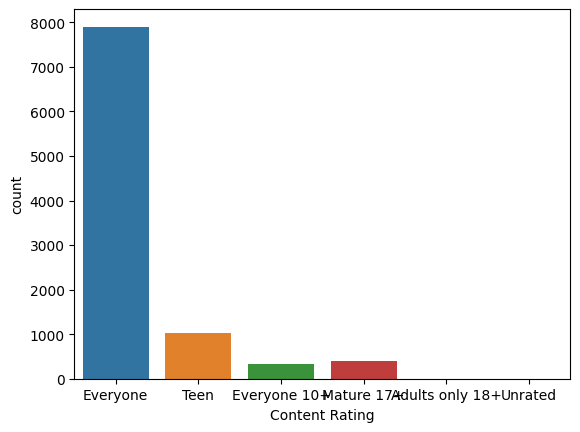

In [61]:
sns.countplot(x=dfcopy["Content Rating"])

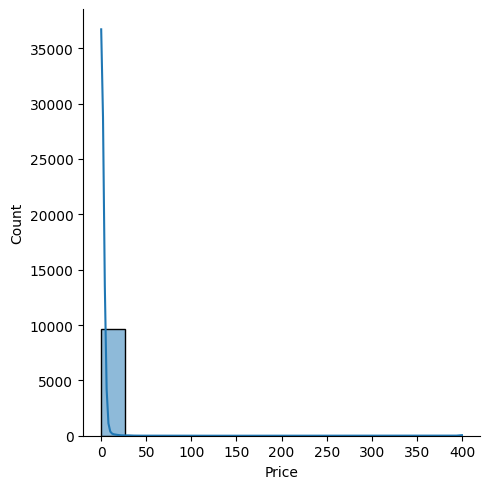

In [62]:
sns.displot(dfcopy["Price"], kde = True)

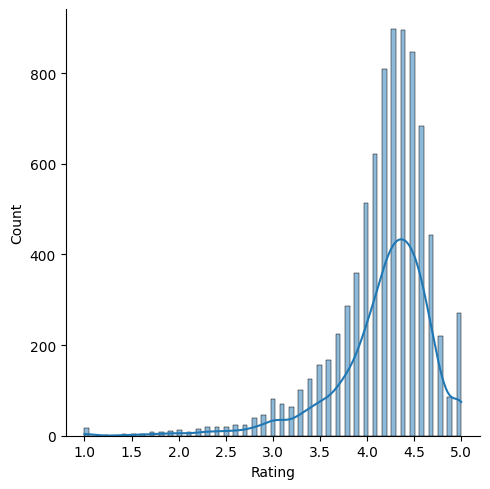

In [63]:
sns.displot(dfcopy["Rating"], kde = True)

<Axes: xlabel='Rating', ylabel='Density'>

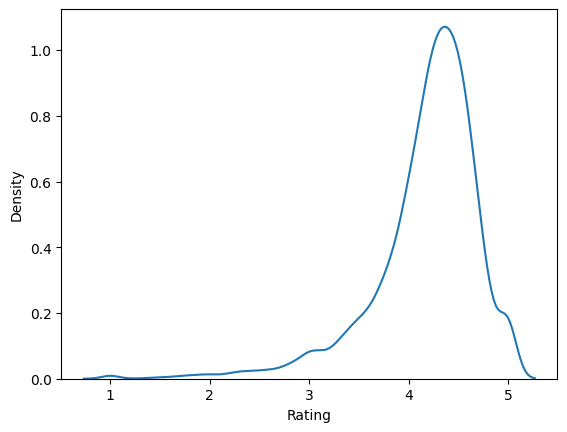

In [64]:
sns.kdeplot(dfcopy.Rating)

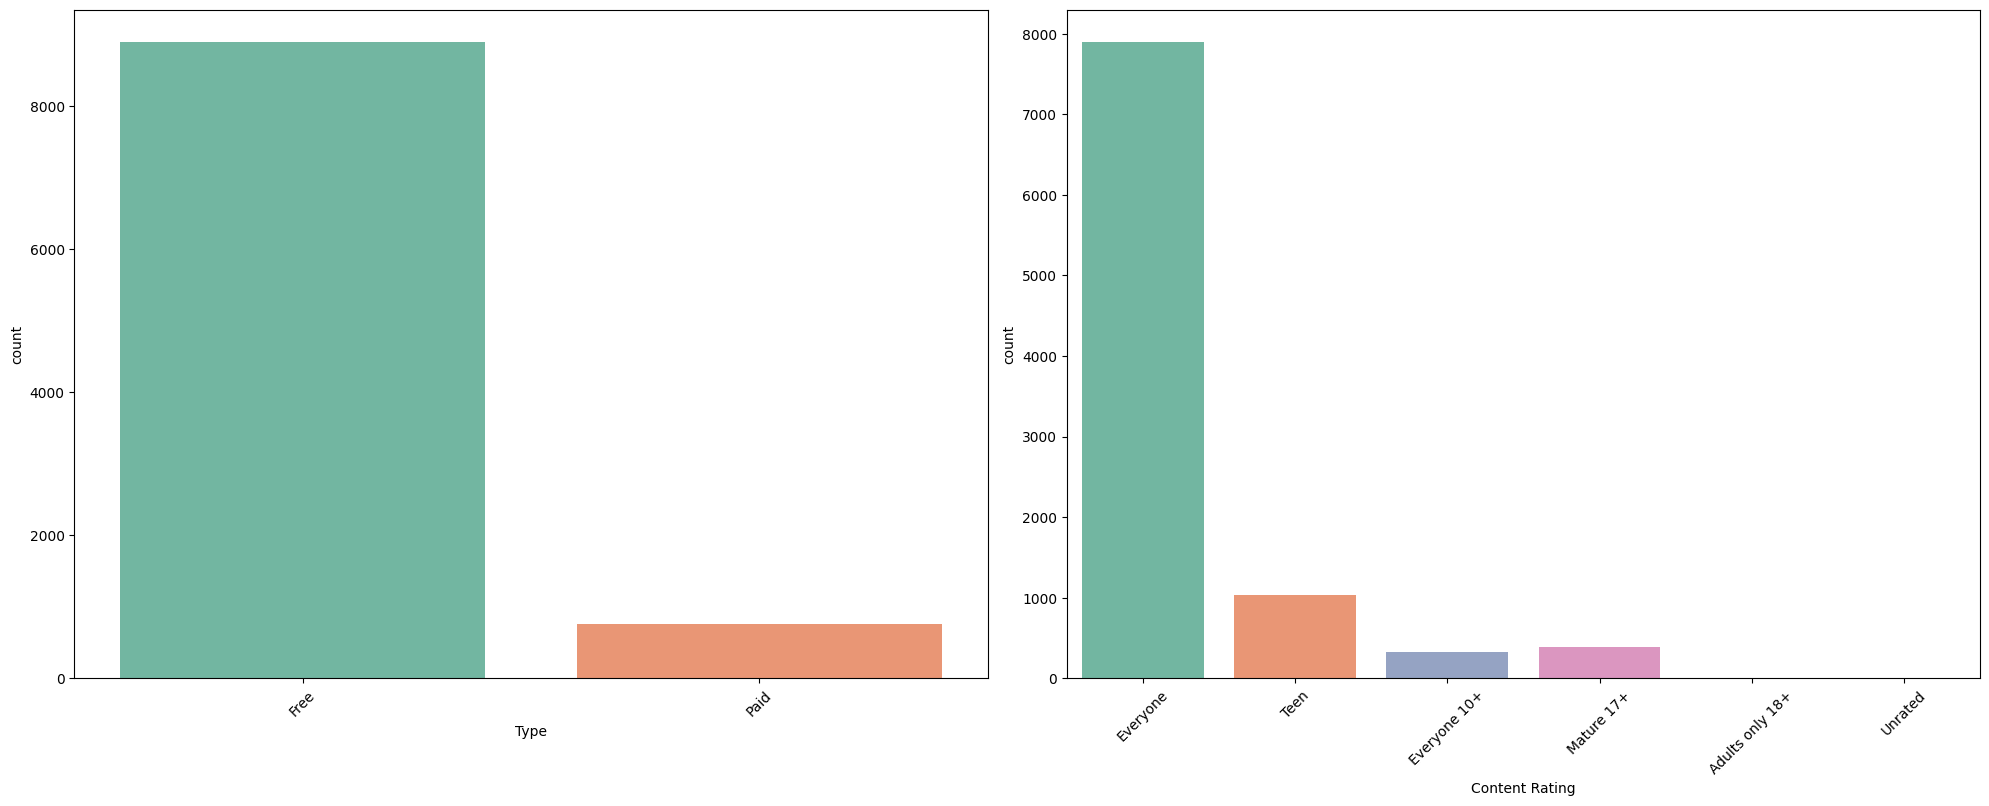

In [65]:
plt.figure(figsize = (20,15))
category = ["Type", "Content Rating"]
for i in range(0,len(category)):
    plt.subplot(2,2,i + 1)
    sns.countplot(x = dfcopy[category[i]], palette = "Set2")
    plt.xticks(rotation = 45)
    plt.tight_layout()

<Axes: ylabel='count'>

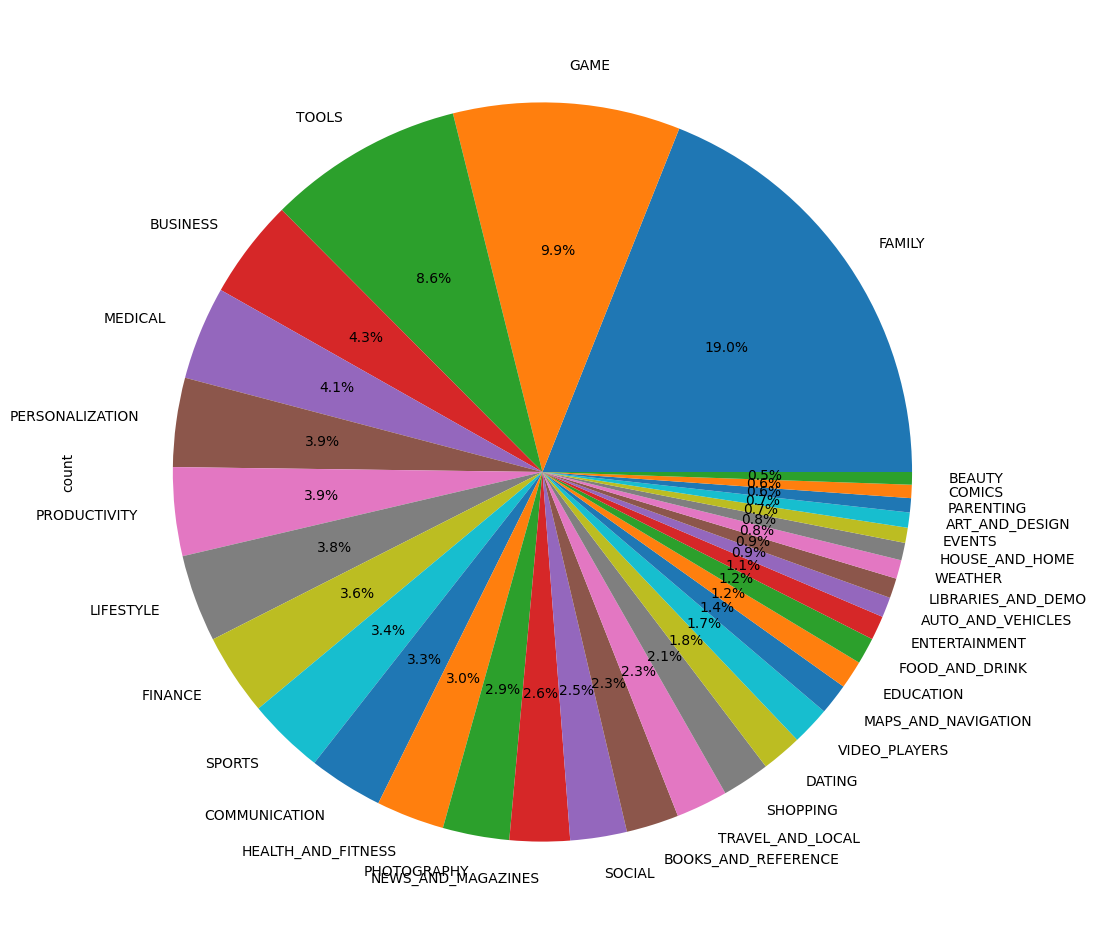

In [66]:
dfcopy["Category"].value_counts().plot.pie(y = df.Category, figsize = (12,12), autopct = '%1.1f%%')

**family is most popular category**

In [106]:
cat = dfcopy.Category.value_counts()[:10]

In [107]:
cat = cat.reset_index()

In [108]:
cat.columns = ["Groups","counts"]

<Axes: xlabel='Groups', ylabel='counts'>

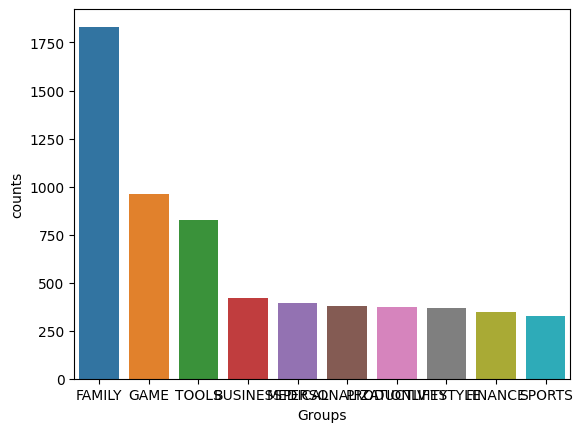

In [109]:
sns.barplot(cat, x = cat["Groups"],y=cat["counts"])

**top 10 categories**

In [110]:
category = cat.join(dfcopy['Installs'])

,Groups,counts
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [71]:
dfcopy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


**games are most installed**

In [72]:
#top 5 installed category apps in each type >> game app of free type
#box plotss

In [77]:
 dfcopy["Type"].value_counts()

Type
Free    8902
Paid     756
Name: count, dtype: int64

In [121]:
#categorieis with installed sum
Category = dfcopy.groupby(['Category', 'Type'])['Installs'].sum().sort_values(ascending=False).reset_index()
#join 

In [127]:
Category = Category.groupby(['Type']).head(5).reset_index(drop = True)

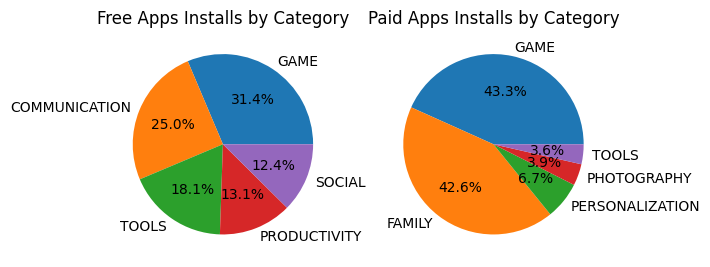

In [151]:
free = Category[Category['Type'] == 'Free']
paid = Category[Category['Type'] == 'Paid']
plt.figure()
plt.subplot(1,2,1)
plt.pie(free.Installs, labels = free.Category, autopct="%1.1f%%")
plt.title("Free Apps Installs by Category")
plt.subplot(1,2,2)
plt.pie(paid.Installs, labels = paid.Category, autopct="%1.1f%%")
# plt.xticks(rotation=90)
plt.title("Paid Apps Installs by Category")
# plt.ylabel("Installs")
plt.show()


In [153]:
free

,Category,Type,Installs
0,GAME,Free,13857924450
1,COMMUNICATION,Free,11036916201
2,TOOLS,Free,8000044474
3,PRODUCTIVITY,Free,5791679314
4,SOCIAL,Free,5487861902


In [154]:
paid

,Category,Type,Installs
5,GAME,Paid,20999965
6,FAMILY,Paid,20649814
7,PERSONALIZATION,Paid,3258794
8,PHOTOGRAPHY,Paid,1878740
9,TOOLS,Paid,1727441


In [168]:
#which category apps users are reviewing the most
reviewcounts = dfcopy.groupby('Category', as_index=False)['Reviews'].sum().sort_values(by='Reviews', ascending=False).reset_index(drop = True)

In [169]:
reviewcounts.head(1)

,Category,Reviews
0,GAME,622298709


**game  is most reviewed**